In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression, SGDClassifier


In [2]:
generated_answer_log_probs_mean_test = np.load("ckpts/sft_ctrex_llama7B_2_commit_lr1e-5_2/checkpoint_30000/hf_model/generated_answer_log_probs_mean_test.npy")
hidden_states_test = np.load("ckpts/ppo_ctrex_llama7B_commit35_idk10/best_checkpoint/hf_model/hidden_states_test.npy")


# generation_categories_ood = np.load("ckpts/ppo_ctrex_llama7B_commit35_idk10/best_checkpoint/hf_model/generation_categories.npy")
# hidden_states_ood = np.load("ckpts/ppo_ctrex_llama7B_commit35_idk10/best_checkpoint/hf_model/hidden_states_ood.npy")

In [5]:
hidden_states_ood.shape

(13, 311574, 4096)

In [3]:
layer=8

In [4]:
mean = np.load("ckpts/ppo_ctrex_llama7B_commit35_idk10/best_checkpoint/hf_model/linear_regression_train_mean.npy")
coef = np.load("ckpts/ppo_ctrex_llama7B_commit35_idk10/best_checkpoint/hf_model/linear_regression_coef.npy")
intercept = np.load("ckpts/ppo_ctrex_llama7B_commit35_idk10/best_checkpoint/hf_model/linear_regression_intercept.npy")

In [15]:
idk_idxs = np.where(generation_categories_ood[:, 3]==1)[0]
commit_idxs = np.where(generation_categories_ood[:, 3]==0)[0]

idk_prejected_representation_norms = (np.dot(hidden_states_ood[layer, idk_idxs, :] - mean, coef.T)+intercept).squeeze()
commit_prejected_representation_norms = (np.dot(hidden_states_ood[layer, commit_idxs, :] - mean, coef.T)+intercept).squeeze()

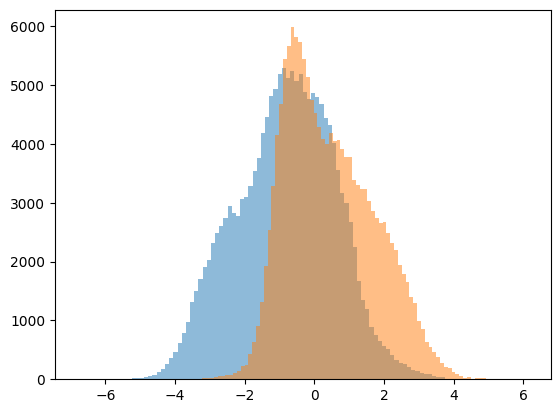

In [16]:
import matplotlib.pyplot as plt

plt.hist(idk_prejected_representation_norms, bins=100, alpha=0.5, label="idk")
plt.hist(commit_prejected_representation_norms, bins=100, alpha=0.5, label="commit")
plt.savefig("ckpts/ppo_ctrex_llama7B_commit35_idk10/best_checkpoint/hf_model/linear_regression_norms.png")

In [37]:
mean = hidden_states_test[layer].mean(axis=0)

In [5]:
np.save("ckpts/ppo_ctrex_llama7B_commit35_idk10/best_checkpoint/hf_model/linear_regression_train_mean.npy", mean)

In [ ]:
train_idxs = np.random.choice(len(X), int(0.8*len(X)), replace=False)
test_idxs = np.array([i for i in range(len(X)) if i not in train_idxs])

In [38]:
X = hidden_states_test[layer]-mean
y = np.exp(generated_answer_log_probs_mean_test)
# y = generation_categories_test[:, 1]

X_train = X[train_idxs]
y_train = y[train_idxs]

In [39]:
from sklearn.linear_model import LinearRegression, SGDClassifier, SGDRegressor

reg = SGDRegressor(alpha=.01).fit(X_train, y_train)
reg.score(X, y)


0.5858814776926007

In [40]:
X_test = (hidden_states_test[layer] - mean)[test_idxs]
y_test = (np.exp(generated_answer_log_probs_mean_test))[test_idxs]

reg.score(X_test, y_test)

: 

In [18]:
reg.coef_.shape

(1, 4096)

In [20]:
reg.intercept_

array([-0.27034284])

In [21]:
np.save("ckpts/ppo_ctrex_llama7B_commit35_idk10/best_checkpoint/hf_model/linear_regression_coef.npy", reg.coef_)
np.save("ckpts/ppo_ctrex_llama7B_commit35_idk10/best_checkpoint/hf_model/linear_regression_intercept.npy", reg.intercept_)

In [23]:
# safe_sparse_dot(X, self.coef_.T, dense_output=True) + self.intercept_


np.load("ckpts/ppo_ctrex_llama7B_commit35_idk10/best_checkpoint/hf_model/linear_regression_coef.npy")

array([[ 0.03779775, -0.34711057, -0.17647992, ...,  0.29834545,
        -0.05283997,  0.36210227]], dtype=float32)